In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2 as cv
import numpy as np
import os 
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
import random
from tqdm import tqdm

[[253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]
 [253 253 253 ... 252 251 251]
 ...
 [255 254 246 ... 253 254 245]
 [237 231 222 ... 206 224 243]
 [247 225 236 ... 212 212 246]]


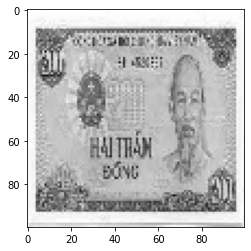

In [4]:
datadir = "/content/drive/MyDrive/AI/Tien"
categories=['200','500','1000','2000','5000','10000','20000','50000','100000','200000','500000']
img_size=100
for category in categories:
  path=os.path.join(datadir,category)
  for img in os.listdir(path):
    img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
    new_array = cv.resize(img_array,(img_size,img_size))
    print(new_array)
    plt.imshow(new_array,cmap='gray')
    plt.show()
    break
  break

In [5]:
#creating training data
training_data=[]
def create_traning_data():

  for category in categories:
    path = os.path.join(datadir,category)
    class_num = categories.index(category)

    for img in tqdm(os.listdir(path)):
      try:
        img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
        new_array = cv.resize(img_array,(img_size,img_size))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass
create_traning_data()
print(len(training_data))

100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

22


In [6]:
#saving (x:picture), (y:label)
X=[]
y=[]
for features, label in training_data :
  X.append(features)
  y.append(label)
X=np.array(X).reshape(-1,img_size,img_size,1)
y=np.array(y)
print('X',X.shape)
print('y',y.shape)

X (22, 100, 100, 1)
y (22,)


In [7]:
#saving x, y as file.pickle into drive
pickle_out=open("/content/drive/MyDrive/AI/Tien/save/X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open("/content/drive/MyDrive/AI/Tien/save/y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [8]:
#BUILD MODEL
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [10]:
pickle_in = open("/content/drive/MyDrive/AI/Tien/save/X.pickle","rb")
X= pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/AI/Tien/save/y.pickle","rb")
y= pickle.load(pickle_in)

X=X/255.0
print('X',X.shape)
print('y',y.shape)

X (22, 100, 100, 1)
y (22,)


In [11]:
y= to_categorical(y,11)

In [12]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(100,100,1)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(11,activation='softmax'))

In [37]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD,Adam
opt =Adam()
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X,y,epochs=30,batch_size=64,validation_split=0.1,verbose=1)

Epoch 1/30
1/1 [==============================] - 3s 3s/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 47.2904 - val_accuracy: 0.0000e+00
Epoch 2/30
1/1 [==============================] - 1s 1s/step - loss: 12.6422 - accuracy: 0.2632 - val_loss: 45.5977 - val_accuracy: 0.0000e+00
Epoch 3/30
1/1 [==============================] - 1s 1s/step - loss: 4.8052 - accuracy: 0.3158 - val_loss: 35.8620 - val_accuracy: 0.0000e+00
Epoch 4/30
1/1 [==============================] - 1s 1s/step - loss: 1.3019 - accuracy: 0.6842 - val_loss: 22.4813 - val_accuracy: 0.0000e+00
Epoch 5/30
1/1 [==============================] - 1s 1s/step - loss: 1.0091 - accuracy: 0.5263 - val_loss: 14.6328 - val_accuracy: 0.0000e+00
Epoch 6/30
1/1 [==============================] - 1s 1s/step - loss: 0.8710 - accuracy: 0.8421 - val_loss: 11.2054 - val_accuracy: 0.0000e+00
Epoch 7/30
1/1 [==============================] - 1s 1s/step - loss: 0.9520 - accuracy: 0.7895 - val_loss: 9.9521 - val_accuracy: 0.0000e+00
Epoch 

In [38]:
model.save('Tien.h5')

In [39]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array 
from keras.models import load_model
import numpy as np  
import matplotlib.pyplot as plt
import cv2 

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(100, 100))	
	
	return img

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
expectation 100000


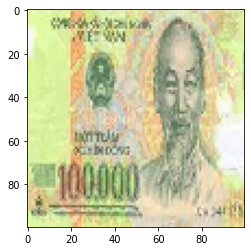

In [42]:
labels = {0: '200',
          1: '500',
          2: '1000',
          3: '2000',
          4: '5000',
          5: '10000',
          6: '20000',
          7: '50000',
          8: '100000',
          9: '200000',
          10: '500000',         
          }
model = load_model('Tien.h5')
	# load model
img = load_image('/content/drive/MyDrive/AI/Tien/100000/1.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
expectation 50000


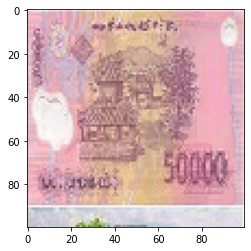

In [43]:
img = load_image('/content/drive/MyDrive/AI/Tien/50000/2.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
expectation 5000


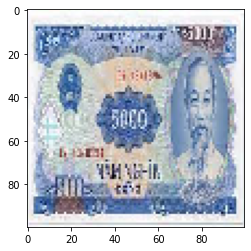

In [44]:
img = load_image('/content/drive/MyDrive/AI/Tien/5000/1.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

In [45]:
from google.colab import drive
drive.mount('/content/drive')
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('TienVN.ipynb')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--2022-05-25 16:51:15--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2022-05-25 16:51:15 (28.0 MB/s) - ‘colab_pdf.py’ saved [1864/1864]





Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/TienVN.ipynb to pdf
[NbConvertApp] Support files will be in TienVN_files/
[NbConvertApp] Making directory ./TienVN_files
[NbConvertApp] Making directory ./TienVN_files
[NbConver

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'